In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [40]:
df = pd.read_csv('spam.csv', encoding='latin1')


In [41]:
df.sample(2)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3953,ham,I probably won't eat at all today. I think I'm...,NaN,NaN,NaN
1750,ham,Got it..mail panren paru..,NaN,NaN,NaN


In [42]:
#1 Data cleaning
#2. EDA
#.3 Text preprocessing
#.Model building
#5. Evaluatoin
#6. Improvement
#7. Website
#8. Deployeeeeeee....

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [44]:
df.drop(columns=['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True)

In [45]:
df.sample(5)

,v1,v2
2151,ham,I surely dont forgot to come:)i will always be...
294,ham,I accidentally deleted the message. Resend ple...
2645,ham,"Sorry, I'll call later"
1171,spam,Got what it takes 2 take part in the WRC Rally...
4630,ham,"Got hella gas money, want to go on a grand nat..."


In [46]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [47]:
df.head(3)

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...


In [48]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [49]:
df['target'] = le.fit_transform(df['target'])

In [50]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [51]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [52]:
#check for duplicate values
df.duplicated().sum()

np.int64(403)

In [53]:
# Removing duplicate values
df = df.drop_duplicates(keep='first')

In [54]:
df.duplicated().sum()

np.int64(0)

In [55]:
df.shape

(5169, 2)

2.EDA


In [56]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x12821d2cf50>,
 [Text(-1.014499732282844, 0.4251944181172162, 'ham'),
  Text(1.0144998708287172, -0.42519408755122207, 'spam')],
 [Text(-0.5533634903360967, 0.2319242280639361, '87.37%'),
  Text(0.553363565906573, -0.231924047755212, '12.63%')])

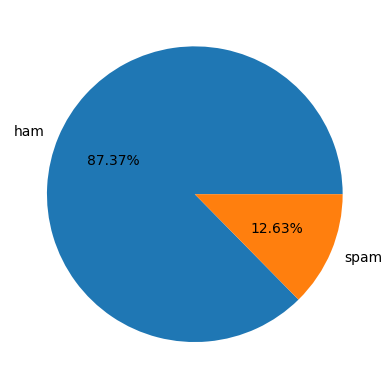

In [57]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f%%")

<Axes: xlabel='target', ylabel='count'>

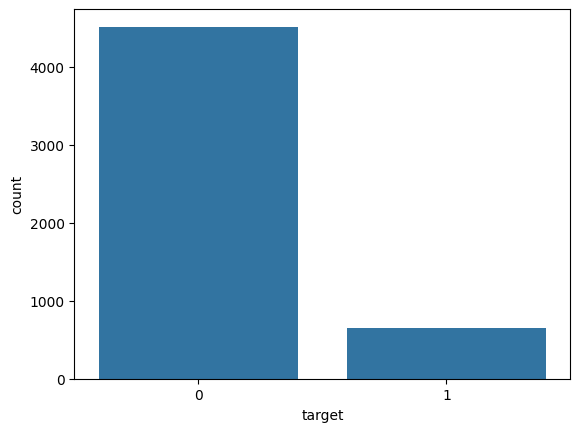

In [58]:
#Data is imbalanced
sns.countplot(x='target',data=df)

In [108]:
import nltk
nltk.download('punkt')      # download tokenizer model
nltk.download('punkt_tab')  # optional, for latest versions

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [75]:
df['num_characters'] = df['text'].apply(len)

C:\Users\karan\AppData\Local\Temp\ipykernel_14220\253964734.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters'] = df['text'].apply(len)


In [70]:
df

,target,text,num_characters,num_sentences,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point, ,, crazy, .., Avail...",111
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar, ..., Joking, wif, u, oni, ...]",29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",155
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor, ..., U, c, alrea...",49
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, do, n't, think, he, goes, to, usf, ,,...",61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,"[This, is, the, 2nd, time, we, have, tried, 2,...",161
5568,0,Will Ì_ b going to esplanade fr home?,37,"[Will, Ì_, b, going, to, esplanade, fr, home, ?]",37
5569,0,"Pity, * was in mood for that. So...any other s...",57,"[Pity, ,, *, was, in, mood, for, that, ., So, ...",57
5570,0,The guy did some bitching but I acted like i'd...,125,"[The, guy, did, some, bitching, but, I, acted,...",125


In [61]:
df.head(1)

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111


In [76]:
#number of words
df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

C:\Users\karan\AppData\Local\Temp\ipykernel_14220\1670810868.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))


In [77]:
df.head (1)

,target,text,num_sentences,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...","[Go, until, jurong, point, ,, crazy, .., Avail...",24,111


In [79]:
df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

C:\Users\karan\AppData\Local\Temp\ipykernel_14220\589552786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))


In [93]:
df.head(1)

,target,text,num_sentences,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111


In [80]:
df[['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,5169.000000,5169.000000,5169.000000
mean,1.965564,18.455794,78.977945
std,1.448541,13.324758,58.236293
min,1.000000,1.000000,2.000000
25%,1.000000,9.000000,36.000000
50%,1.000000,15.000000,60.000000
75%,2.000000,26.000000,117.000000
max,38.000000,220.000000,910.000000


In [82]:
df[df['target'] == 0] [['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,4516.000000,4516.000000,4516.000000
mean,1.820195,17.123782,70.459256
std,1.383657,13.493970,56.358207
min,1.000000,1.000000,2.000000
25%,1.000000,8.000000,34.000000
50%,1.000000,13.000000,52.000000
75%,2.000000,22.000000,90.000000
max,38.000000,220.000000,910.000000


In [84]:
#for spam
df[df['target'] == 1] [['num_sentences','num_words','num_characters']].describe()

,num_sentences,num_words,num_characters
count,653.000000,653.000000,653.000000
mean,2.970904,27.667688,137.891271
std,1.488425,7.008418,30.137753
min,1.000000,2.000000,13.000000
25%,2.000000,25.000000,132.000000
50%,3.000000,29.000000,149.000000
75%,4.000000,32.000000,157.000000
max,9.000000,46.000000,224.000000


<Axes: xlabel='num_characters', ylabel='Count'>

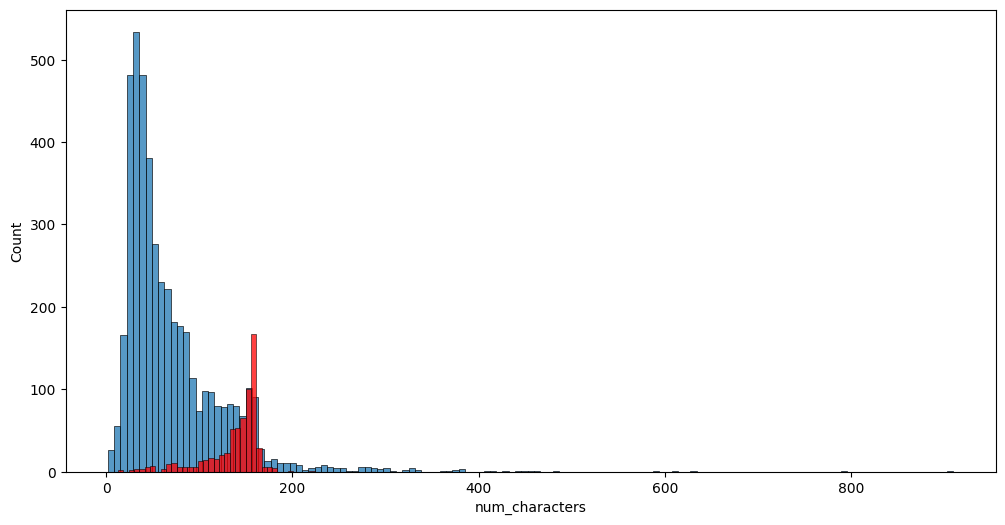

In [88]:
df[df['target'] == 0]['num_characters']
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

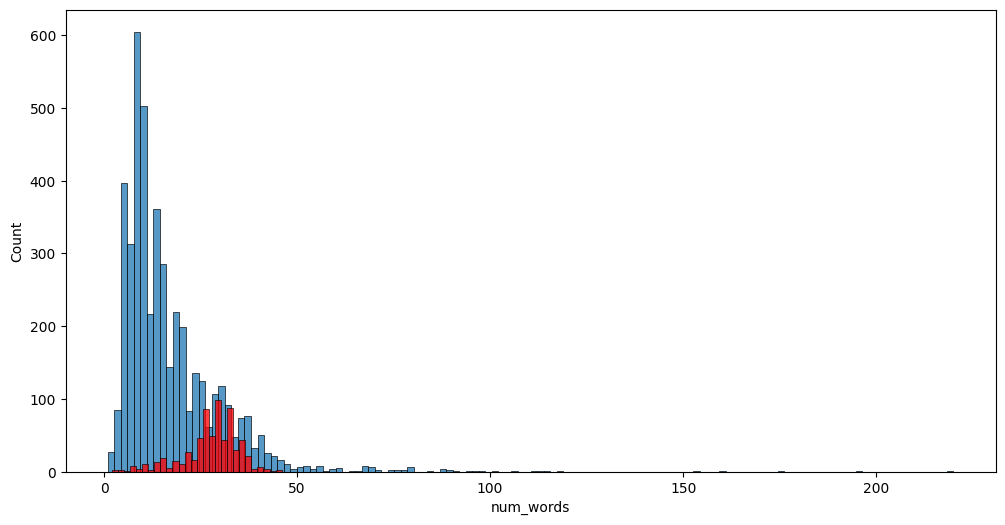

In [89]:
df[df['target'] == 0]['num_characters']
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

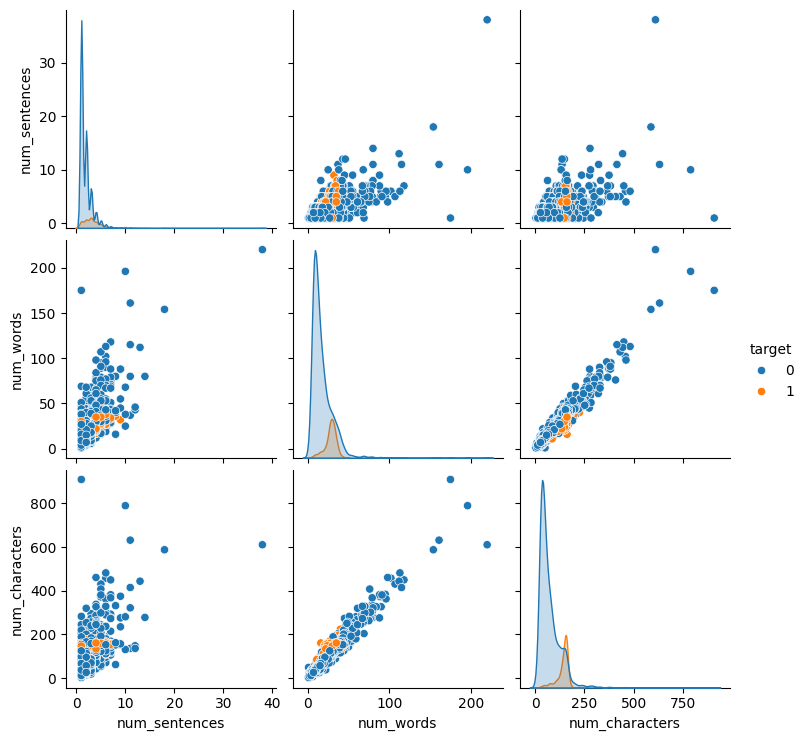

In [90]:
sns.pairplot(df,hue='target')

In [94]:
sns.heatmap(df.corr(), annot=True)

ValueError: could not convert string to float: 'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [95]:
df

,target,text,num_sentences,num_words,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111
1,0,Ok lar... Joking wif u oni...,2,8,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155
3,0,U dun say so early hor... U c already then say...,1,13,49
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61
...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,4,35,161
5568,0,Will Ì_ b going to esplanade fr home?,1,9,37
5569,0,"Pity, * was in mood for that. So...any other s...",2,15,57
5570,0,The guy did some bitching but I acted like i'd...,1,27,125


In [ ]:
#Data Preprocessing
#1. Lower case
#2. Tokenization
#3. Removing special characters
#4. remove stop words and punctuation
#5. stemming

In [118]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')  # download stopwords list (run once)

stopwords.words('english') #these are for sentences formation these are common words like is am the and etc which do not add much meaning to the sentence
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('running')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\karan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'run'

In [119]:
import string

def transform_text(text):

    text = text.lower()
    text = nltk.word_tokenize(text=text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return  " ".join(y)

In [122]:
transform_text("Go until jurong point, crazy.. Available only in bugis n great world t.")

'go jurong point crazi avail bugi n great world'

In [121]:
df['text'][0]

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [124]:
df['transformed_text'] = df['text'].apply(transform_text)

C:\Users\karan\AppData\Local\Temp\ipykernel_14220\283536690.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transformed_text'] = df['text'].apply(transform_text)


In [125]:
df.head()

,target,text,num_sentences,num_words,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61,nah think goe usf live around though


In [130]:
from wordcloud import WordCloud

In [134]:
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] ==1]['transformed_text'].str.cat(sep=" "))

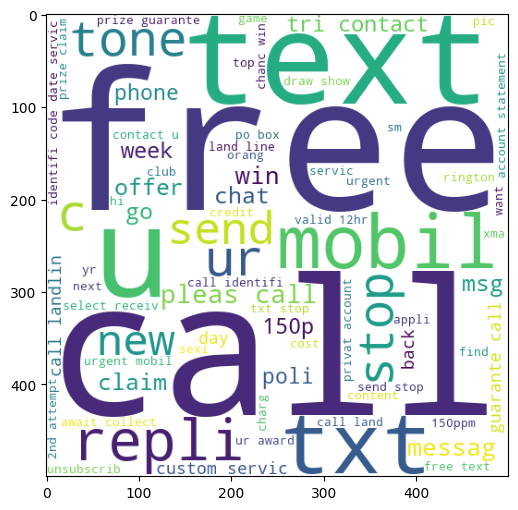

In [136]:
plt.figure(figsize=(10,6))
plt.imshow(wc)

In [ ]:
ham_wc = wc.generate(df[df['target'] ==0]['transformed_text'].str.cat(sep=" "))

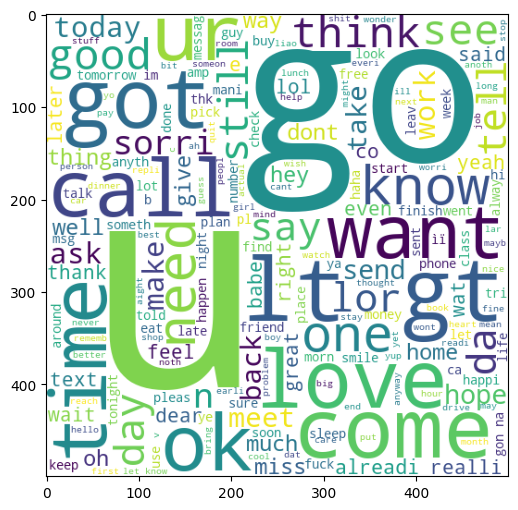

In [138]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [139]:
df.head()

,target,text,num_sentences,num_words,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,2,8,29,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,2,37,155,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,1,13,49,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",1,15,61,nah think goe usf live around though


In [146]:
spam_counter = []

for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for words in msg.split():
        spam_counter.append(words)

In [147]:
len(spam_counter)

9939

In [160]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_counter).most_common(30))[0],Counter(spam_counter).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

SyntaxError: unmatched ')' (2756082077.py, line 2)

In [152]:
ham_counter = []

for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for words in msg.split():
        ham_counter.append(words)

In [153]:
len(ham_counter)

35404

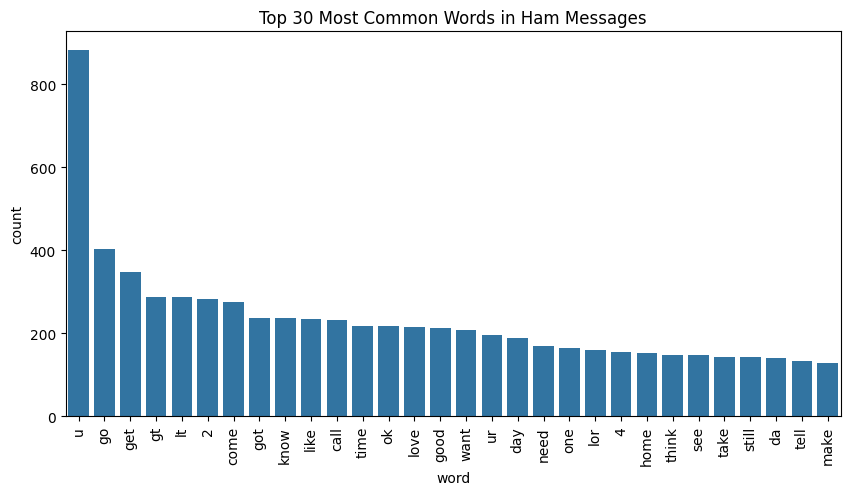

In [159]:
ham_common = pd.DataFrame(Counter(ham_counter).most_common(30), columns=['word', 'count'])

# Correct barplot syntax
plt.figure(figsize=(10, 5))
sns.barplot(x='word', y='count', data=ham_common)
plt.xticks(rotation=90)
plt.title('Top 30 Most Common Words in Ham Messages')
plt.show()

In [161]:
df.head(1)

,target,text,num_sentences,num_words,num_characters,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",2,24,111,go jurong point crazi avail bugi n great world...


In [162]:
# 4>model building
# textal data per navie base acha result deta hai 
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer

In [174]:
from sklearn.model_selection import train_test_split
cv = CountVectorizer()
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [175]:
X.shape

(5169, 6708)

In [176]:
y

array([0, 0, 1, ..., 0, 0, 0], shape=(5169,))

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=2)
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [178]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [179]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))

0.876905041031653
0.5059523809523809
[[1326  166]
 [  44  170]]


In [180]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))

0.9554513481828839
1.0
[[1492    0]
 [  76  138]]


In [181]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))

0.9695193434935522
0.9764705882352941
[[1488    4]
 [  48  166]]


In [182]:

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [183]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [184]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [185]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [186]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9730363423212193, 0.9772727272727273)

In [187]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9730363423212193
Precision -  0.9772727272727273
For  KN
Accuracy -  0.8991793669402111
Precision -  1.0
For  NB
Accuracy -  0.9554513481828839
Precision -  1.0
For  DT
Accuracy -  0.9372801875732708
Precision -  0.8203592814371258
For  LR
Accuracy -  0.9484173505275498
Precision -  0.9315068493150684
For  RF
Accuracy -  0.97010550996483
Precision -  0.9939393939393939
For  AdaBoost
Accuracy -  0.9237983587338804
Precision -  0.8043478260869565
For  BgC
Accuracy -  0.9613130128956624
Precision -  0.87
For  ETC
Accuracy -  0.9759671746776084
Precision -  0.9832402234636871
For  GBDT
Accuracy -  0.9490035169988277
Precision -  0.8895705521472392
For  xgb
Accuracy -  0.9683470105509965
Precision -  0.925531914893617


In [ ]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(5169, 6708))

In [190]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [191]:

performance_df

,Algorithm,Accuracy,Precision
1,KN,0.899179,1.000000
2,NB,0.955451,1.000000
5,RF,0.970106,0.993939
8,ETC,0.975967,0.983240
0,SVC,0.973036,0.977273
4,LR,0.948417,0.931507
10,xgb,0.968347,0.925532
9,GBDT,0.949004,0.889571
7,BgC,0.961313,0.870000
3,DT,0.937280,0.820359


In [192]:

performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [193]:

performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.899179
1,NB,Accuracy,0.955451
2,RF,Accuracy,0.970106
3,ETC,Accuracy,0.975967
4,SVC,Accuracy,0.973036
5,LR,Accuracy,0.948417
6,xgb,Accuracy,0.968347
7,GBDT,Accuracy,0.949004
8,BgC,Accuracy,0.961313
9,DT,Accuracy,0.937280


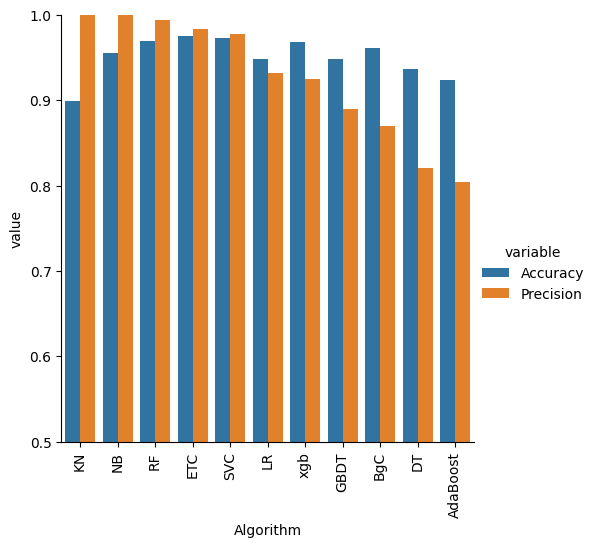

In [194]:

sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [195]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [196]:

new_df = performance_df.merge(temp_df,on='Algorithm')

In [197]:

new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [198]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [199]:

new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,Precision_max_ft_3000_x,Accuracy_max_ft_3000_y,Precision_max_ft_3000_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.899179,1.000000,0.899179,1.000000,0.899179,1.000000,0.899179,1.000000
1,NB,0.955451,1.000000,0.955451,1.000000,0.955451,1.000000,0.955451,1.000000
2,RF,0.970106,0.993939,0.970106,0.993939,0.970106,0.993939,0.970106,0.993939
3,ETC,0.975967,0.983240,0.975967,0.983240,0.975967,0.983240,0.975967,0.983240
4,SVC,0.973036,0.977273,0.973036,0.977273,0.973036,0.977273,0.973036,0.977273
5,LR,0.948417,0.931507,0.948417,0.931507,0.948417,0.931507,0.948417,0.931507
6,xgb,0.968347,0.925532,0.968347,0.925532,0.968347,0.925532,0.968347,0.925532
7,GBDT,0.949004,0.889571,0.949004,0.889571,0.949004,0.889571,0.949004,0.889571
8,BgC,0.961313,0.870000,0.961313,0.870000,0.961313,0.870000,0.961313,0.870000
9,DT,0.937280,0.820359,0.937280,0.820359,0.937280,0.820359,0.937280,0.820359


In [200]:

# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [201]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [ ]:
voting.fit(X_train,y_train)

In [ ]:

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [ ]:

y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))


In [ ]:

# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()

In [204]:

from sklearn.ensemble import StackingClassifier

In [ ]:
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [ ]:

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

In [206]:

import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))